In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import pandas as pd

In [6]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data['Species'] = pd.DataFrame(iris.target)

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
x = data.iloc[:, :-1] # selects till second last column of dataframe
y = data.iloc[:, -1] # selects last column of dataframe

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

In [21]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [23]:
print("Target\tPredicted")

for i in range(y_test.shape[0]):
    print(pd.DataFrame(y_test).iloc[i, 0], "\t", y_pred[i])

Target	Predicted
2 	 2
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
2 	 2
0 	 0
2 	 2
0 	 0
0 	 0
2 	 2
2 	 2
2 	 2
2 	 2
1 	 1
1 	 1
0 	 0
2 	 2
0 	 0
1 	 1
1 	 1
2 	 2
1 	 1
2 	 2
2 	 2
1 	 1
2 	 2
2 	 2
2 	 2
1 	 1
0 	 0
2 	 2
2 	 2
2 	 2
1 	 1
1 	 1
2 	 2
0 	 0
1 	 1


In [24]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test).round(2) * 100)

100.0


In [26]:
score = []
k_range = range(1, 31)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score.append(accuracy_score(y_pred, y_test).round(2) * 100)

In [27]:
for k in k_range:
    print(k, " : ", score[k-1])

1  :  100.0
2  :  100.0
3  :  100.0
4  :  96.0
5  :  100.0
6  :  98.0
7  :  100.0
8  :  98.0
9  :  98.0
10  :  98.0
11  :  100.0
12  :  100.0
13  :  100.0
14  :  98.0
15  :  98.0
16  :  96.0
17  :  96.0
18  :  96.0
19  :  96.0
20  :  96.0
21  :  96.0
22  :  96.0
23  :  98.0
24  :  96.0
25  :  96.0
26  :  96.0
27  :  96.0
28  :  96.0
29  :  96.0
30  :  96.0


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

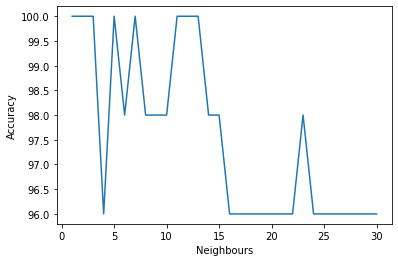

In [29]:
plt.plot(k_range, score)
plt.xlabel("Neighbours")
plt.ylabel("Accuracy")
plt.show()